# UMAP & MNIST

This notebook walks you through the use of a really amazing TSNE-like dimensionality reduction technique called [UMAP](https://github.com/lmcinnes/umap) on the MNIST dataset to terraform a Planetoid. Follow the link to learn more about it and get it installed.

In [1]:
import sys
sys.path.append("..")

In [2]:
#temp, will probably have to modify the demo to use an installed version from PyPi
from planetoids import planetoids as pt
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\autonotebook\__init__.py:18: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)



Technically, you can use any labelled data in two dimensions to generate a new planetoid. However, this package was specifically designed with algorithms like UMAP in mind for dealing with larger datasets.

You will have to play around a bit with the hyperparameters of your chosen algorithm to produce some nice separated clusters.

I like the pairing of UMAP & Planetoids as it produces globular clusters with a convenient API to control the density of the produced clusters.

C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning:

Embedding a total of 4 separate connected components using meta-embedding (experimental)



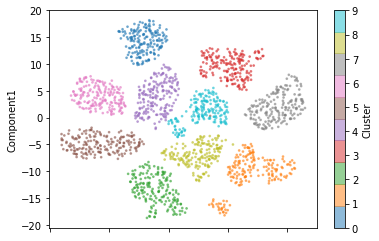

In [3]:
from sklearn.datasets import load_digits
from umap import UMAP
import matplotlib.pyplot as plt

#load the mnist dataset
data = load_digits()

#reduce the data down to two dimensions using 
#here we are specifically using UMAP in a supervised
#manner leveraging the target labels
reducer = UMAP(n_components=2,
                    min_dist=1.7,
                    spread=2,
                    target_weight=0.5,
                    random_state=42,
                    n_epochs=50
                   )

embedding = reducer.fit_transform(data.data, y=data.target)

reduced = pd.DataFrame(embedding, columns=['Component1', 'Component2'])
reduced['Cluster'] = data.target

reduced.plot(kind='scatter', x='Component2', y='Component1', c='Cluster', cmap='tab10', s=3, alpha=0.5)
plt.show()

As you can see in the scatter plot above, the labelled handwritten digits have been grouped into their respective clusters ready to seed the creation of a Planetoid!

In [ ]:
mnist = pt.Planetoid(reduced,
                     'Component1',
                     'Component2',
                     'Cluster').fit_terraform(planet_name='MNIST Demo')